## May 21st

Basic tensorflow to build a logistic regression for binary classification

In [26]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import random
random.seed(100)

In [18]:
data = load_breast_cancer()
# train test split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

12/12 [==============================] - 0s 549us/step - loss: 0.1381 - accuracy: 0.9554
Training accuracy = 0.9554
6/6 [==============================] - 0s 695us/step - loss: 0.1207 - accuracy: 0.9734
Testing accuracy = 0.9734


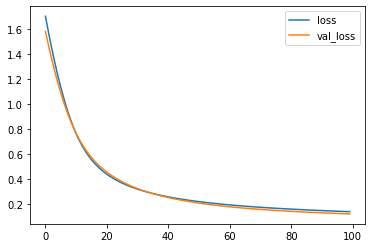

In [36]:
# mode fitting 
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 0)

print("Training accuracy = %.4f"%model.evaluate(X_train, y_train)[1])
print("Testing accuracy = %.4f"%model.evaluate(X_test, y_test)[1])

plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()